In [1]:
import numpy as np
import matplotlib.pyplot as plt

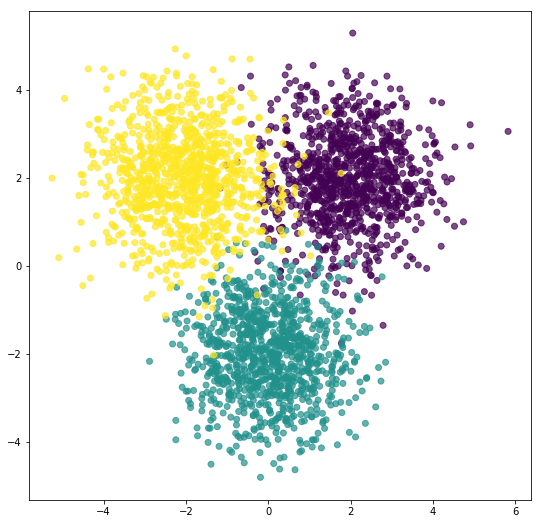

In [20]:
#Simulate data

D =2
K = 3

N = int(K*1e3)

X0 = np.random.randn((N//K), D) + np.array(([2,2]))
X1 = np.random.randn((N//K), D) + np.array(([0,-2]))
X2 = np.random.randn((N//K), D) + np.array(([-2,2]))
X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.figure(figsize=(9,9))
plt.scatter(X[:,0],X[:,1], c=y, alpha =.7);

In [144]:
Phi = np.column_stack(([1] * X.shape[0], X))
Y = np.vstack((np.unique(y) == i for i in y))

In [149]:
def softmax(h):
    return np.exp(h) / np.vstack(np.sum(np.exp(h),axis=1))

def cross_entropy(y,p):
    return -np.sum(y*np.log(p))

def get_y_hat(p):
    return np.apply_along_axis(lambda x: x == max(x), 1, p) + 0

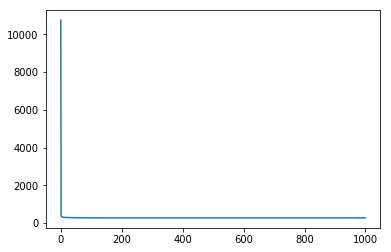

In [150]:
W = np.random.randn(Phi.shape[1], Y.shape[1])


eta = 1e-3

epochs = int(1e3)
J=np.zeros(epochs)

for e in range(epochs):
    P_hat = softmax(Phi.dot(W))
    J[e] = cross_entropy(Y,P_hat)
    W -= eta * (Phi.T.dot(P_hat - Y) )

plt.plot(J);


In [151]:
Y_hat = get_y_hat(P_hat)

np.sum(Y*Y_hat)/Y.shape[0]

0.9663333333333334

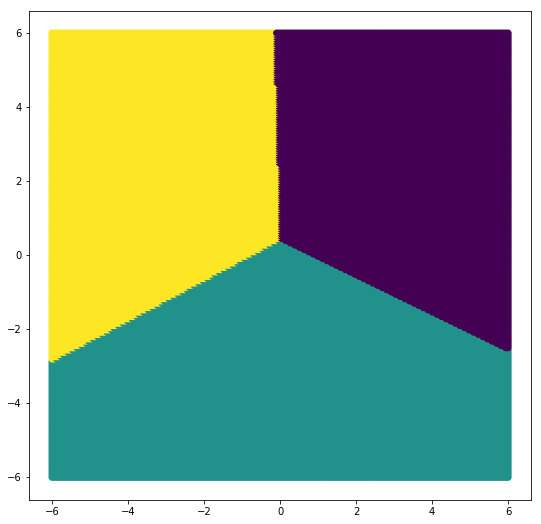

In [171]:
x = np.linspace(-6,6,200)
xx=np.vstack([[(1, i,j) for i in x] for j in x])

plt.figure(figsize=(9,9))
plt.scatter(xx[:,1],xx[:,2], c=get_y_hat(softmax(xx.dot(W))).dot(np.arange(3).T));